In [1]:
%matplotlib notebook

from __future__ import division
import math
import sys
import os
import csv
import sqlite3
import pandas
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import minimize
import pywt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

sys.path.append('.')
import scripts2d.utils as u
from wde.estimator import WaveletDensityEstimator
from wde.simple_estimator import SimpleWaveletDensityEstimator
from wde.common import np_mult
from wde.thresholding import soft_threshold, hard_threshold, block_threshold


In [2]:
def contour_plot_it(dists, data, title='Contour', fname=None):
    fig = plt.figure(figsize=(4, 4), dpi=144)
    X = np.linspace(0.0,1.0, num=75)
    Y = np.linspace(0.0,1.0, num=75)
    XX, YY = np.meshgrid(X, Y)
    if type(dists) is not tuple:
        dists=(dists,)
    minz, maxz = float('inf'), float('-inf')
    Zs = []
    for dist in dists:
        Z = dist.pdf((XX, YY))
        Zs.append(Z)
        minz = min(minz, Z.min())
        maxz = max(maxz, Z.max())
    levels = np.linspace(minz, maxz, num=10)
    cmap = cm.get_cmap('BuGn')
    if minz == 0:
        levels = np.linspace(minz + (maxz-minz)/100, maxz, num=10)
        cmap.set_under("magenta")
    linestyles = enumerate(['solid','dashed', 'dashdot', 'dotted'])
    cmaps = enumerate([cm.get_cmap(cmap_code) for cmap_code in ['binary', 'BuGn', 'OrRd', 'cool']])
    alphas = enumerate([0.4,1.0,0.2,0.2])
    for dist, Z in zip(dists, Zs):
        linestyle = next(linestyles)[1]
        cmap = next(cmaps)[1]
        cs = plt.contour(XX, YY, Z, alpha=(next(alphas)[1]), linestyles=linestyle, levels=levels, extend='min', cmap=cmap)
        if linestyle == 'dashed':
            plt.clabel(cs, inline=1, fontsize=10)
    plt.scatter(data[:,0], data[:,1], s=1, alpha=0.1)
    #avg = data.mean(axis=0)
    #plt.scatter(avg[0],avg[1], s=10, marker='+', color='r')
    plt.title(title)
    if fname is not None:
        plt.savefig('data/%s' % fname, pad_inches=0.0, orientation='portrait', frameon=False)
    plt.show()
    
def plot_it(dist, fname=None):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.linspace(0.0,1.0, num=75)
    Y = np.linspace(0.0,1.0, num=75)
    XX, YY = np.meshgrid(X, Y)
    Z = dist.pdf((XX, YY))
    surf = ax.plot_surface(XX, YY, Z, edgecolors='k', linewidth=0.5, cmap=cm.get_cmap('BuGn'))
    #ax.set_zlim(0, 5)
    if fname is not None:
        plt.savefig('data/%s' % fname, pad_inches=0.0, orientation='portrait', frameon=False)
    plt.show()


ISE j0=1, j1=1: 8.88556314054


<IPython.core.display.Javascript object>


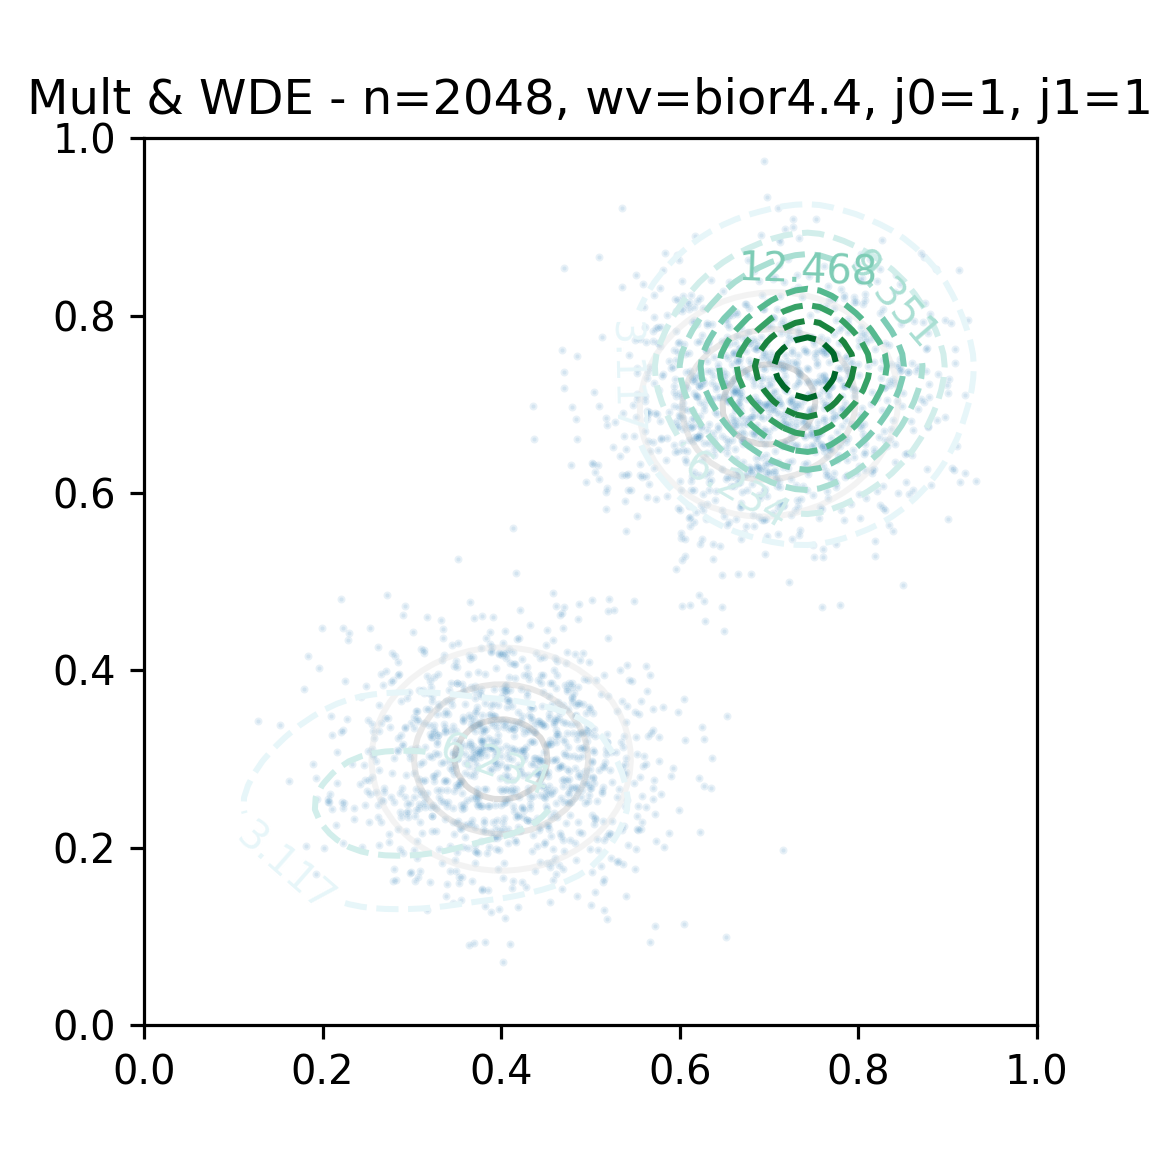

In [8]:
wde_glob = None
def p11(n, wv, **kwargs):
    global wde_glob
    dist = u.dist_from_code('mix2')
    data = dist.rvs(n)
    wde = WaveletDensityEstimator(wv, **kwargs)
    #print data.mean(axis=0)
    wde.fit(data)
    #print 'sum of coeffs',wde.norm_const
    XX, YY = u.mise_mesh()
    Z = dist.pdf((XX, YY))
    ise = u.calc_ise(wde.pdf, Z)
    print 'ISE j0=%d, j1=%d:' % (kwargs['j0'], kwargs['j1']), ise
    contour_plot_it((dist, wde), data, 'Mult & WDE - n=%d, wv=%s, j0=%d, j1=%d' % (n, wv, kwargs['j0'], kwargs['j1']))
    #plot_it(wde)
    wde_glob = wde
p11(2048, 'bior4.4', j0=1, j1=1)

In [4]:
def with_pywv():
    wave = pywt.Wavelet('bior4.4')
    #print wave.dec_lo, wave.dec_hi
    #print wave.rec_lo, wave.rec_hi
    #return
    p_phi, p_psi, d_phi, d_psi, x = wave.wavefun(level=10)
    plt.figure()
    plt.plot(x, p_phi)
    plt.plot(x, d_phi)
    plt.legend(['Phi', 'dual Phi'])
    print wave.dec_len
    plt.show()
    plt.figure()
    plt.plot(x, p_psi)
    plt.plot(x, d_psi)
    plt.legend(['Psi', 'dual Psi'])
    print wave.rec_len
    plt.show()
#with_pywv()

In [5]:
1/0.1767766952966369

5.65685424949238

In [6]:
0.125 ** 0.5

0.3535533905932738